# Naive Bayes using Scikit-Learn

#### Python Imports

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [28]:
%matplotlib inline
plt.style.use('seaborn')

#### Load and Display the Glass Identification Data Set
Source: [UCI Machine Learning Repository - Glass Identification Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data)

**Attribute**

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
    - 1 building_windows_float_processed
    - 2 building_windows_non_float_processed
    - 3 vehicle_windows_float_processed
    - 4 vehicle_windows_non_float_processed (none in this database)
    - 5 containers
    - 6 tableware
    - 7 headlamps

In [29]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
glass_df = pd.read_csv(url, header=None)
glass_df = glass_df.drop(glass_df.columns[0], axis=1)
glass_df.columns = ['r_index', 'sodium', 'magnesium', 'aluminum', 'silicon', 'potassium', 'calcium', 'barium', 'iron', 'glass_type']
glass_df

,r_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


#### Display the feature information about the Glass Identification data set

In [30]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   r_index     214 non-null    float64
 1   sodium      214 non-null    float64
 2   magnesium   214 non-null    float64
 3   aluminum    214 non-null    float64
 4   silicon     214 non-null    float64
 5   potassium   214 non-null    float64
 6   calcium     214 non-null    float64
 7   barium      214 non-null    float64
 8   iron        214 non-null    float64
 9   glass_type  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


#### Create the training and test data sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(glass_df, glass_df['glass_type'], test_size=0.25, random_state=101)
X_train = X_train.drop('glass_type', axis=1)
X_test = X_test.drop('glass_type', axis=1)

#### Scale the training and test data set

In [32]:
scaler = StandardScaler()
s_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
s_X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)

#### Display the distribution plot for the feature `r_index`

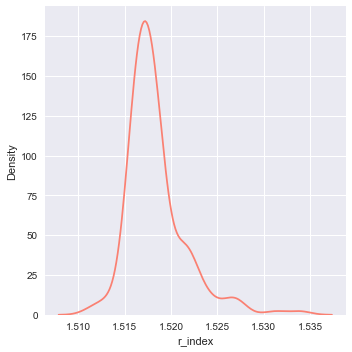

In [33]:
sns.displot(X_train, x='r_index', color='salmon', kind='kde')
plt.show()

#### Display the distribution plot for the feature `aluminum`

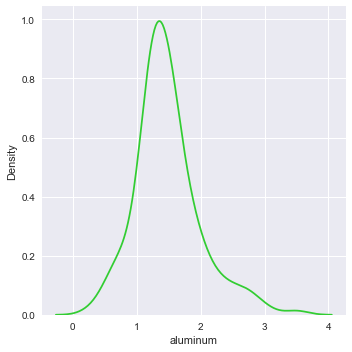

In [34]:
sns.displot(X_train, x='aluminum', color='limegreen', kind='kde')
plt.show()

#### Display the distribution plot for the feature `barium`

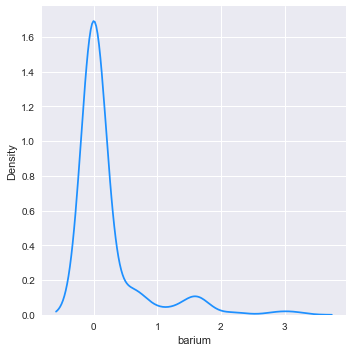

In [35]:
sns.displot(X_train, x='barium', color='dodgerblue', kind='kde')
plt.show()

#### Display the distribution plot along with scatter plot for the remaining features

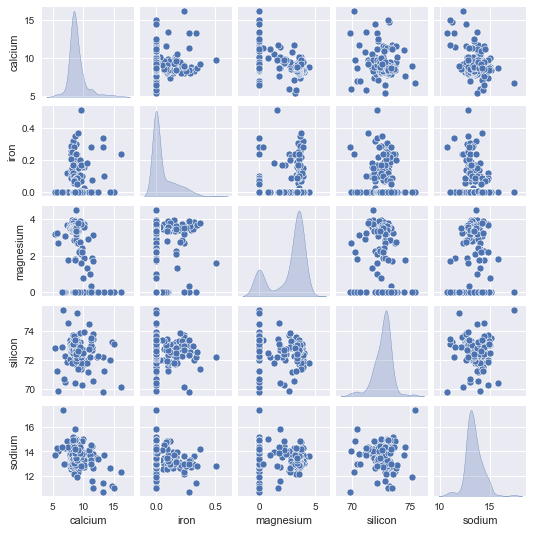

In [36]:
sns.pairplot(glass_df[['calcium', 'iron', 'magnesium', 'silicon', 'sodium']], height=1.5, diag_kind='kde')
plt.show()

#### Initialize and fit the Gaussian Naive Bayes model

In [37]:
model = GaussianNB()
model.fit(s_X_train, y_train)

GaussianNB()

#### Predict the target `glass_type` using the test data set

In [38]:
y_predict = model.predict(s_X_test)

#### Display the accuracy score

In [40]:
accuracy_score(y_test, y_predict)

0.2777777777777778

#### Perform grid search to find and display the optimal hyperparameter

`var_smoothing` is a hyperparameter to widen the normal curve to include more samples from the distribution mean

In [56]:
parameters = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
cv_model = GridSearchCV(estimator=model, param_grid=parameters, cv=5, verbose=1, scoring='accuracy')
cv_model.fit(s_X_train, y_train)
cv_model.best_params_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


{'var_smoothing': 0.01}

#### Re-Initialize and fit the Gaussian Naive Bayes model with the optimal hyperparameter

In [57]:
model = GaussianNB(var_smoothing=0.01)
model.fit(s_X_train, y_train)

GaussianNB(var_smoothing=0.01)

#### Predict the target `glass_type` using the test data set

In [58]:
y_predict = model.predict(s_X_test)

#### Display the accuracy score

In [59]:
accuracy_score(y_test, y_predict)

0.5370370370370371